In [27]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, multilabel_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

## Problem Statement

### We are try to analyse employee data and try to find possible reason for there attrition,        Attrition : Wether employee leaves the organisation or not.
    

## Data Gathering

In [31]:
df6=pd.read_csv('HR_data.csv')


In [32]:
y=df6['Attrition'].replace({'Yes':1,'No':0})
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [33]:
df=pd.read_csv('HR_data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [35]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### Handling Missing Value

In [36]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [37]:
#Checking for duplicate value

df.duplicated().sum()

0

#### no duplicate records

### There is no missing value


In [38]:
df.shape

(1470, 35)

### Statistical Analysis

In [39]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Attrition

In [40]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot: ylabel='Attrition'>

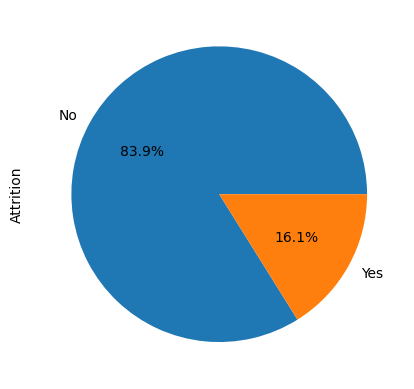

In [41]:
df["Attrition"].value_counts(normalize=True).plot.pie(autopct='%.1f%%')


###### Here We Conclude that
Total Attrition ,Yes=16.1% and No=83.9% So data is Imbalanced

<AxesSubplot: xlabel='Attrition', ylabel='count'>

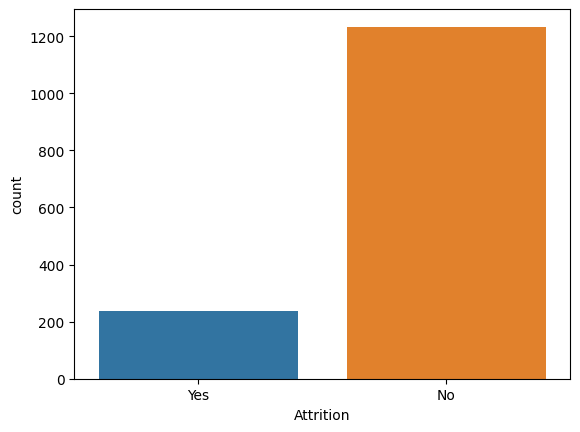

In [42]:
sns.countplot(x='Attrition',data=df)

In [43]:
attrition_dummies = pd.get_dummies(df['Attrition'])
attrition_dummies.head()

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [44]:
df = pd.concat([df, attrition_dummies] , axis = 1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,No,Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,1,0


In [45]:
df = df.drop(['Attrition' , 'No'] , axis = 1)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,0


#### As we focus on Attrion so .Lable encoding done through get dummies and Attrition and NO features are droped
 
 

In [46]:
# Dropped the feature which is not in that much help in EDA
#It having fixed falue

df1 = df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1)


#### Correlation

<AxesSubplot: >

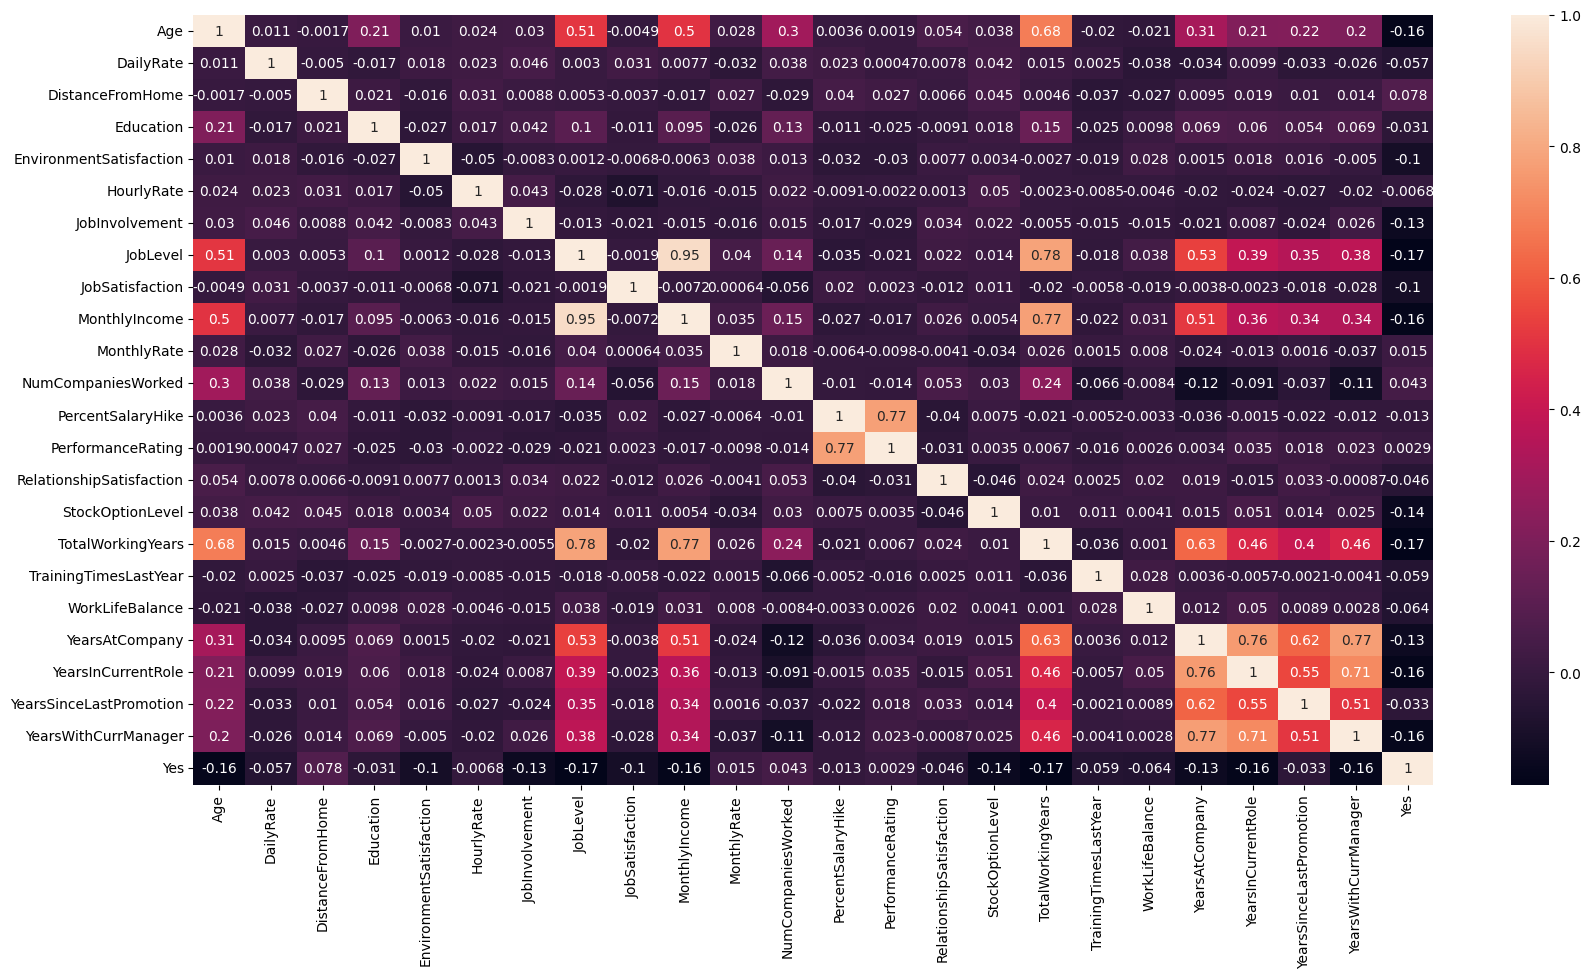

In [47]:

plt.figure(figsize = (20,10))
sns.heatmap(df1.corr(),annot=True)

### Separate continuous and categorical features

In [48]:
def catconsep(df):
    cat, con = [], []
    for i in df1.columns:
        if df1[i].dtype=='object':
            cat.append(i)
        else:
            con.append(i)
    return cat, con

cat,con=catconsep(df1)
print('Catagorical Features:\n',cat)
print('**'*110)
print('Continuous Features:\n',con)

Catagorical Features:
 ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
****************************************************************************************************************************************************************************************************************************
Continuous Features:
 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Yes']


In [49]:
df_con=df[con]
df_con

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,1,0,8,0,1,6,4,0,5,1
1,49,279,8,1,3,61,2,2,2,5130,...,4,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,4,92,2,1,3,2090,...,2,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,3,0,8,3,3,8,7,3,0,0
4,27,591,2,1,1,40,3,1,2,3468,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,1,17,3,3,5,2,0,3,0
1466,39,613,6,1,4,42,2,3,1,9991,...,1,1,9,5,3,7,7,1,7,0
1467,27,155,4,3,2,87,4,2,2,6142,...,2,1,6,0,3,6,2,0,3,0
1468,49,1023,2,3,4,63,2,2,2,5390,...,4,0,17,3,2,9,6,0,8,0


### Finding outliers and handling it

In [51]:
# scaled = StandardScaler().fit_transform(df1) 
# df_scaled = pd.DataFrame(data=scaled, columns= df1.columns)
# sns.boxplot(data=df_scaled, orient="h")
# # plt.gcf().set_size_inches(15, 10)
df2=df1
df2

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,...,3,1,17,3,3,5,2,0,3,0
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,...,1,1,9,5,3,7,7,1,7,0
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,...,2,1,6,0,3,6,2,0,3,0
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,...,4,0,17,3,2,9,6,0,8,0


In [52]:
#  for i in df2.columns:
#     plt.figure(figsize=(8,1))
#     sns.boxplot(df2[i])

In [53]:
def impute_outliers(col):
    q1 = col.quantile(0.25)
    q2 = col.quantile(0.5)
    q3 = col.quantile(0.75)

    print('Q1 == ', q1)
    print('Q2 == ', q2)
    print('Q3 == ', q3)

    iqr = q3 - q1
    print('IQR == ', iqr)

    upper_tail = q3 + 1.5*iqr  # 
    lower_tail = q1 - 1.5*iqr

    print('Upper Tail :', upper_tail)
    print('Lower Tail :', lower_tail)
    
    col.loc[col > upper_tail] = q2
    col.loc[col < lower_tail] = q2
  

In [54]:

for i in df_con:
    print(df_con[i])
    impute_outliers(df_con[i])
   
    

0       41
1       49
2       37
3       33
4       27
        ..
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64
Q1 ==  30.0
Q2 ==  36.0
Q3 ==  43.0
IQR ==  13.0
Upper Tail : 62.5
Lower Tail : 10.5
0       1102
1        279
2       1373
3       1392
4        591
        ... 
1465     884
1466     613
1467     155
1468    1023
1469     628
Name: DailyRate, Length: 1470, dtype: int64
Q1 ==  465.0
Q2 ==  802.0
Q3 ==  1157.0
IQR ==  692.0
Upper Tail : 2195.0
Lower Tail : -573.0
0        1
1        8
2        2
3        3
4        2
        ..
1465    23
1466     6
1467     4
1468     2
1469     8
Name: DistanceFromHome, Length: 1470, dtype: int64
Q1 ==  2.0
Q2 ==  7.0
Q3 ==  14.0
IQR ==  12.0
Upper Tail : 32.0
Lower Tail : -16.0
0       2
1       1
2       2
3       4
4       1
       ..
1465    2
1466    1
1467    3
1468    3
1469    3
Name: Education, Length: 1470, dtype: int64
Q1 ==  2.0
Q2 ==  3.0
Q3 ==  4.0
IQR ==  2.0
Upper Tail : 7.0
Low

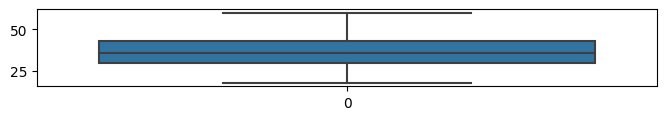

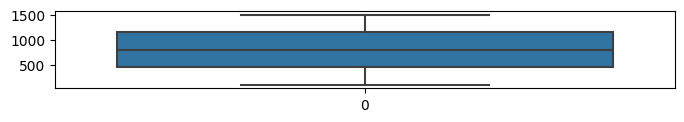

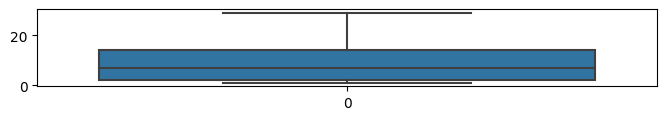

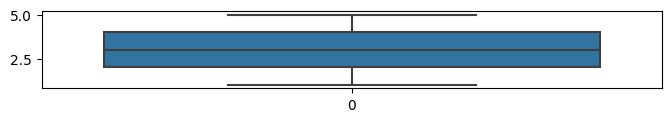

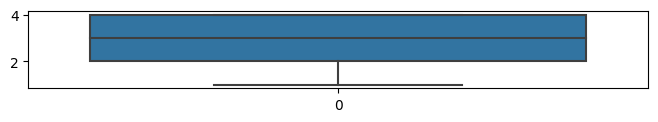

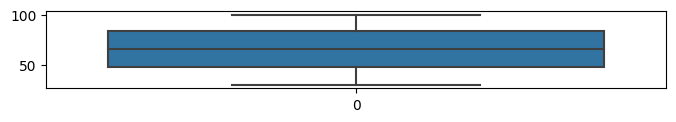

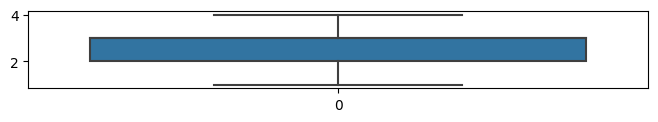

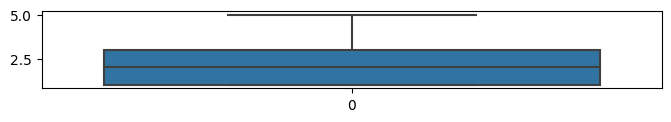

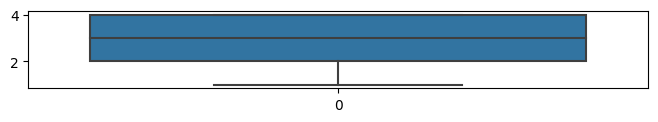

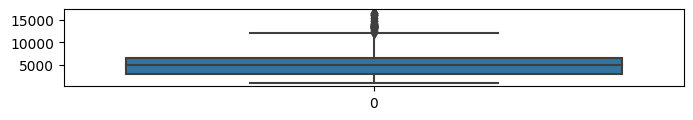

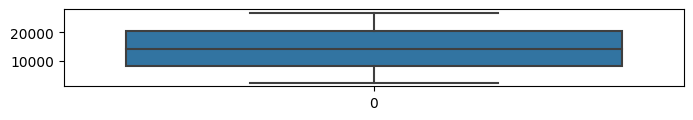

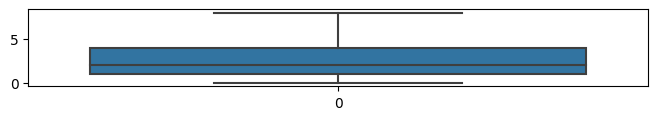

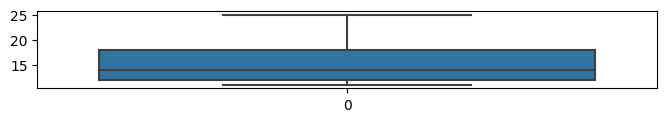

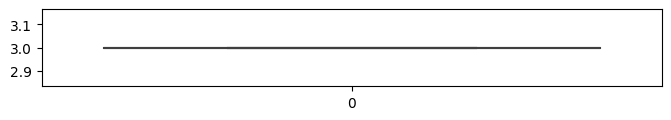

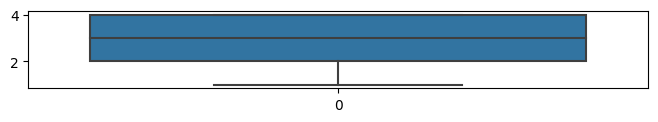

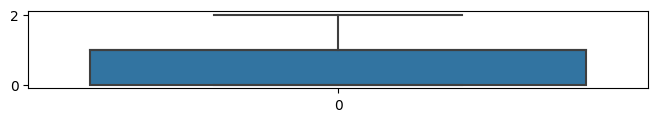

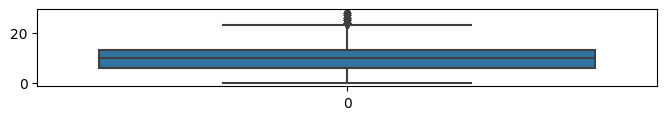

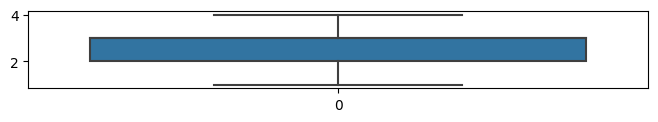

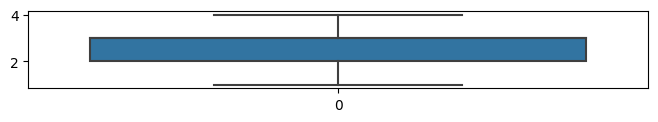

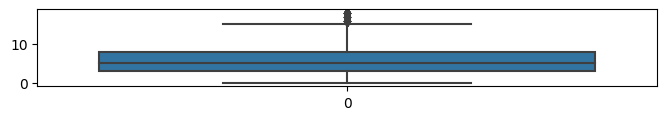

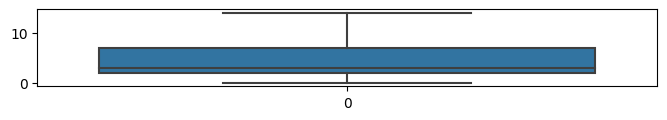

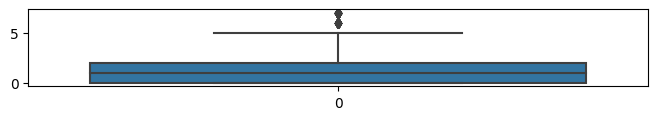

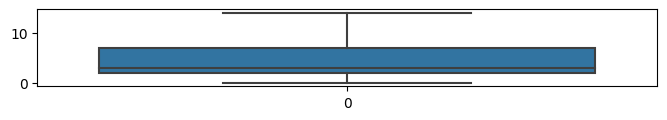

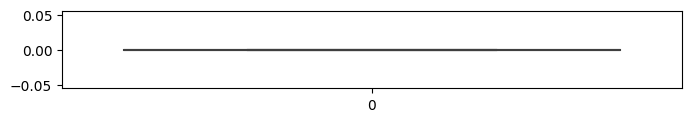

In [55]:
 for i in df_con.columns:
    plt.figure(figsize=(8,1))
    sns.boxplot(df_con[i])

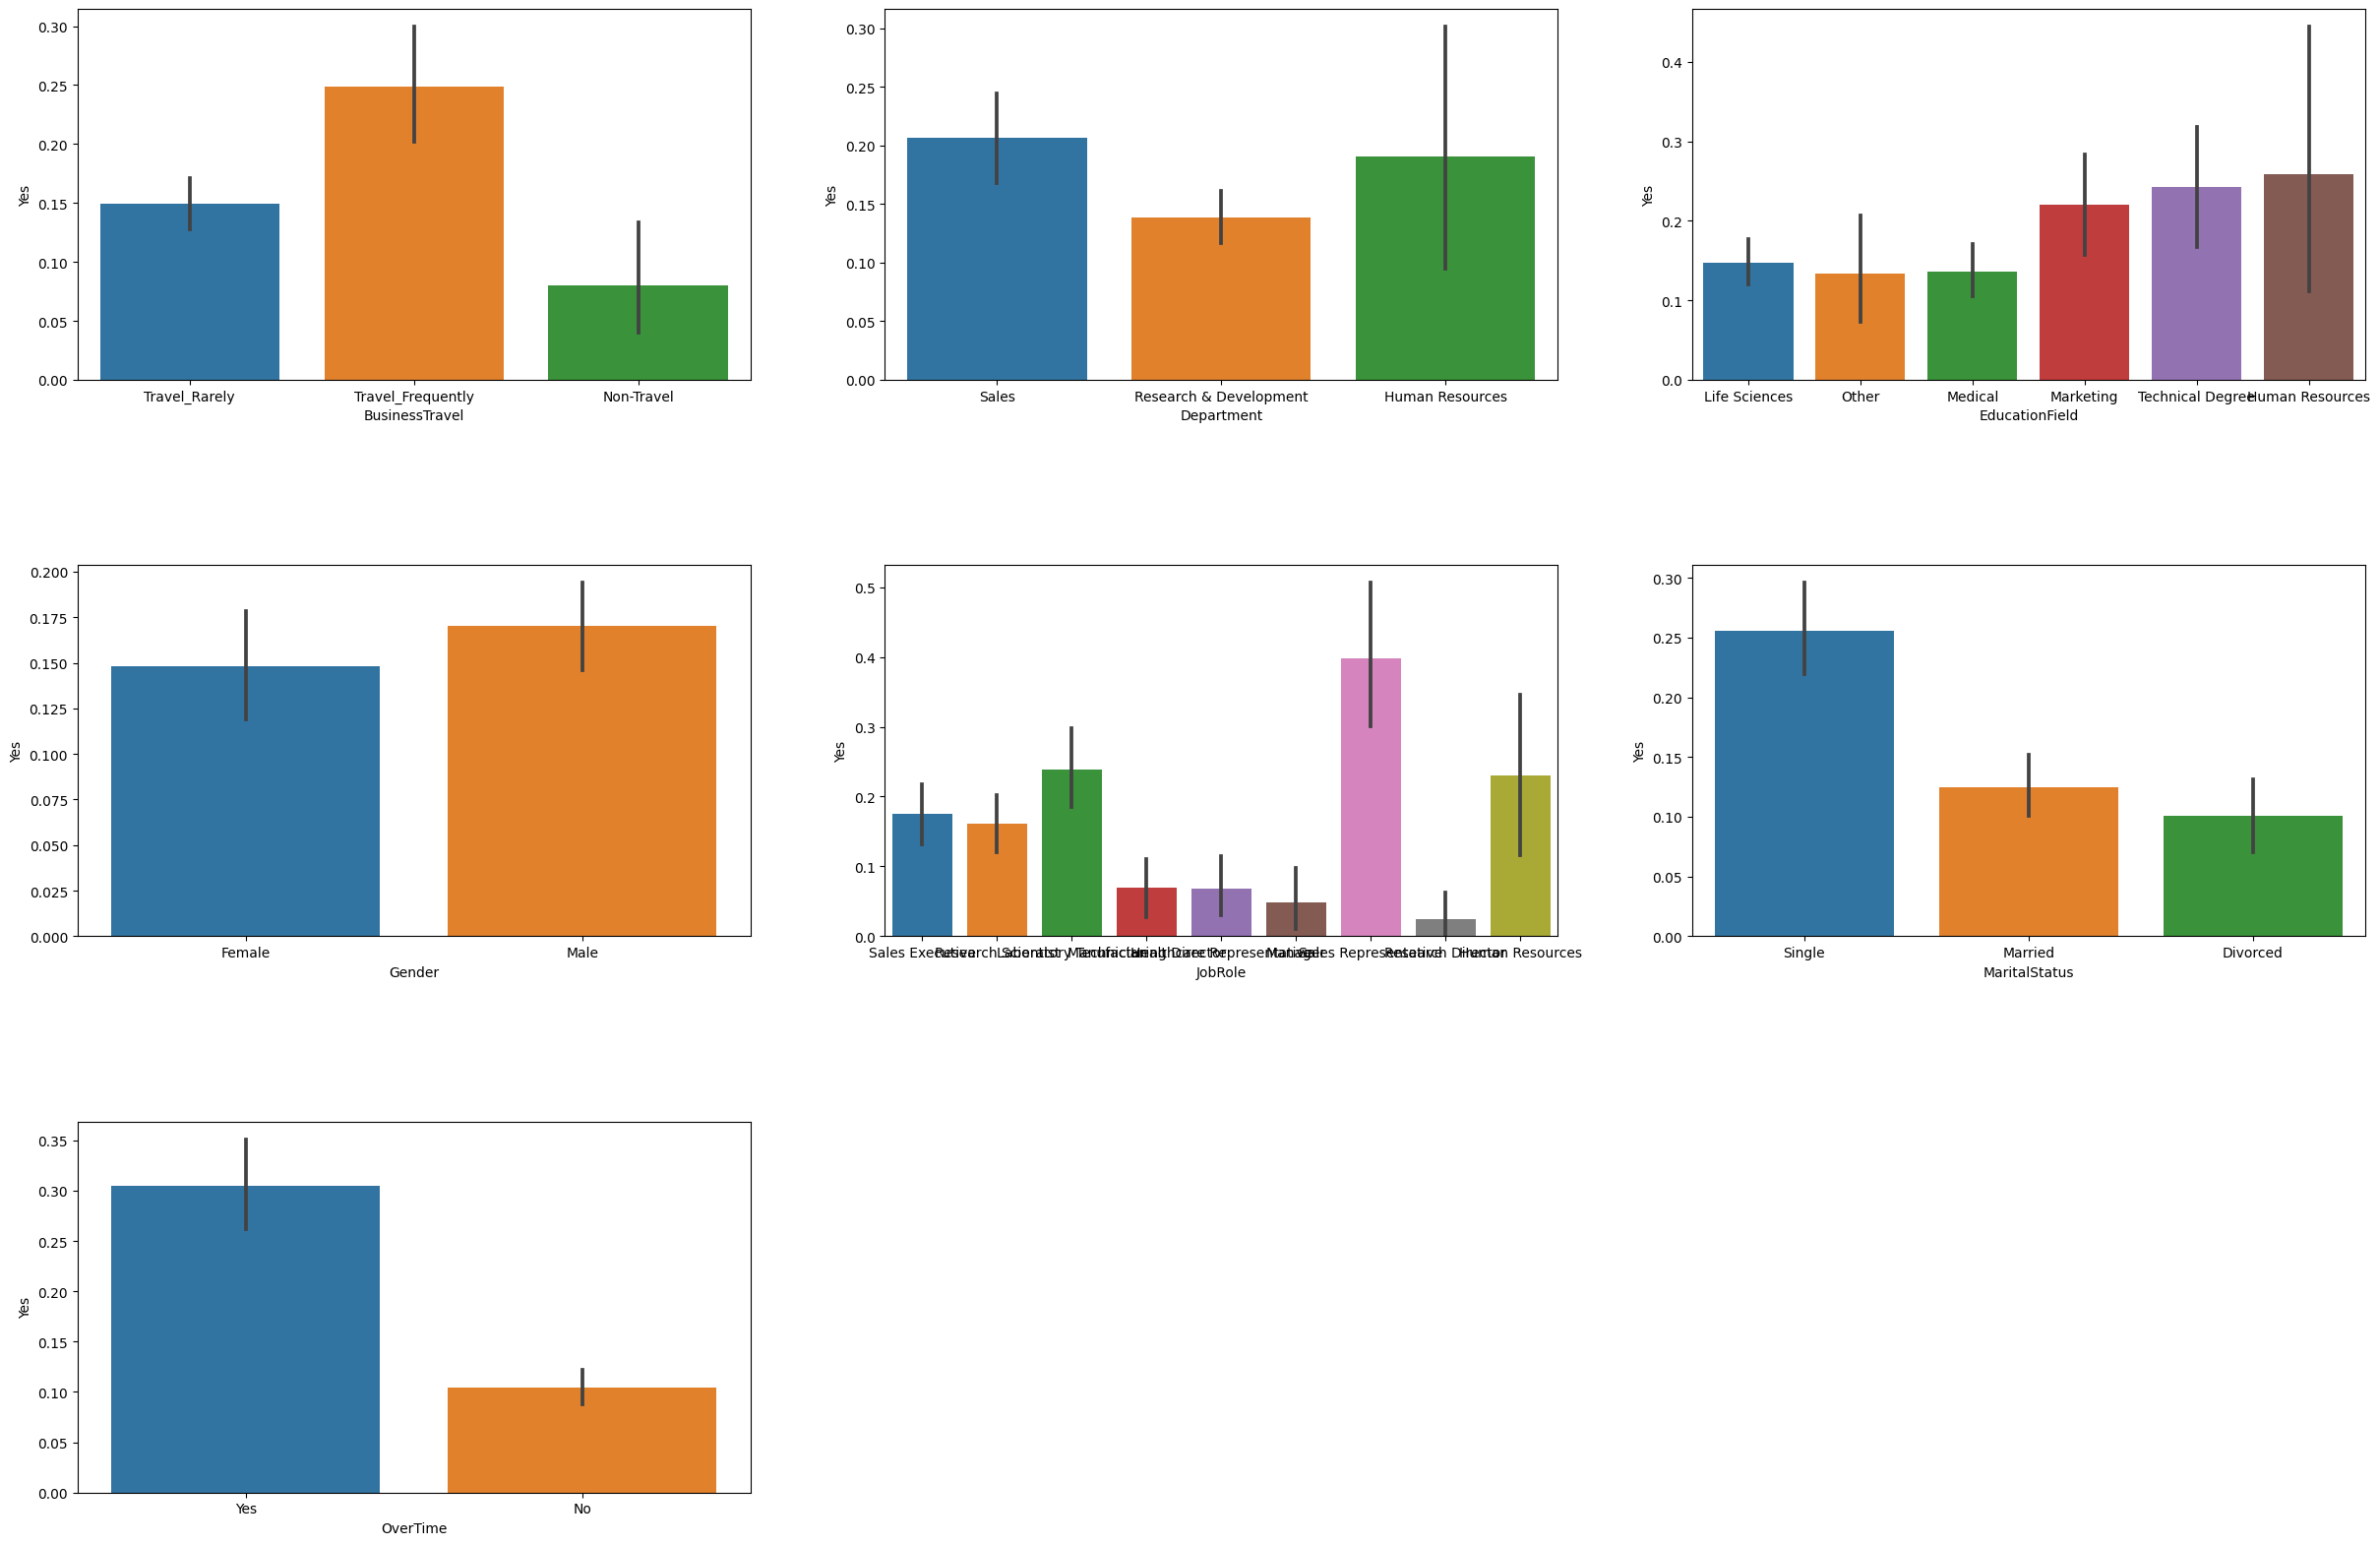

In [56]:
plt.figure(figsize=(30,50))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.2)
for i in cat:
    plt.subplot(9,3,x)
    x = x + 1
    sns.barplot(x=i,y='Yes',data=df1)
plt.show()

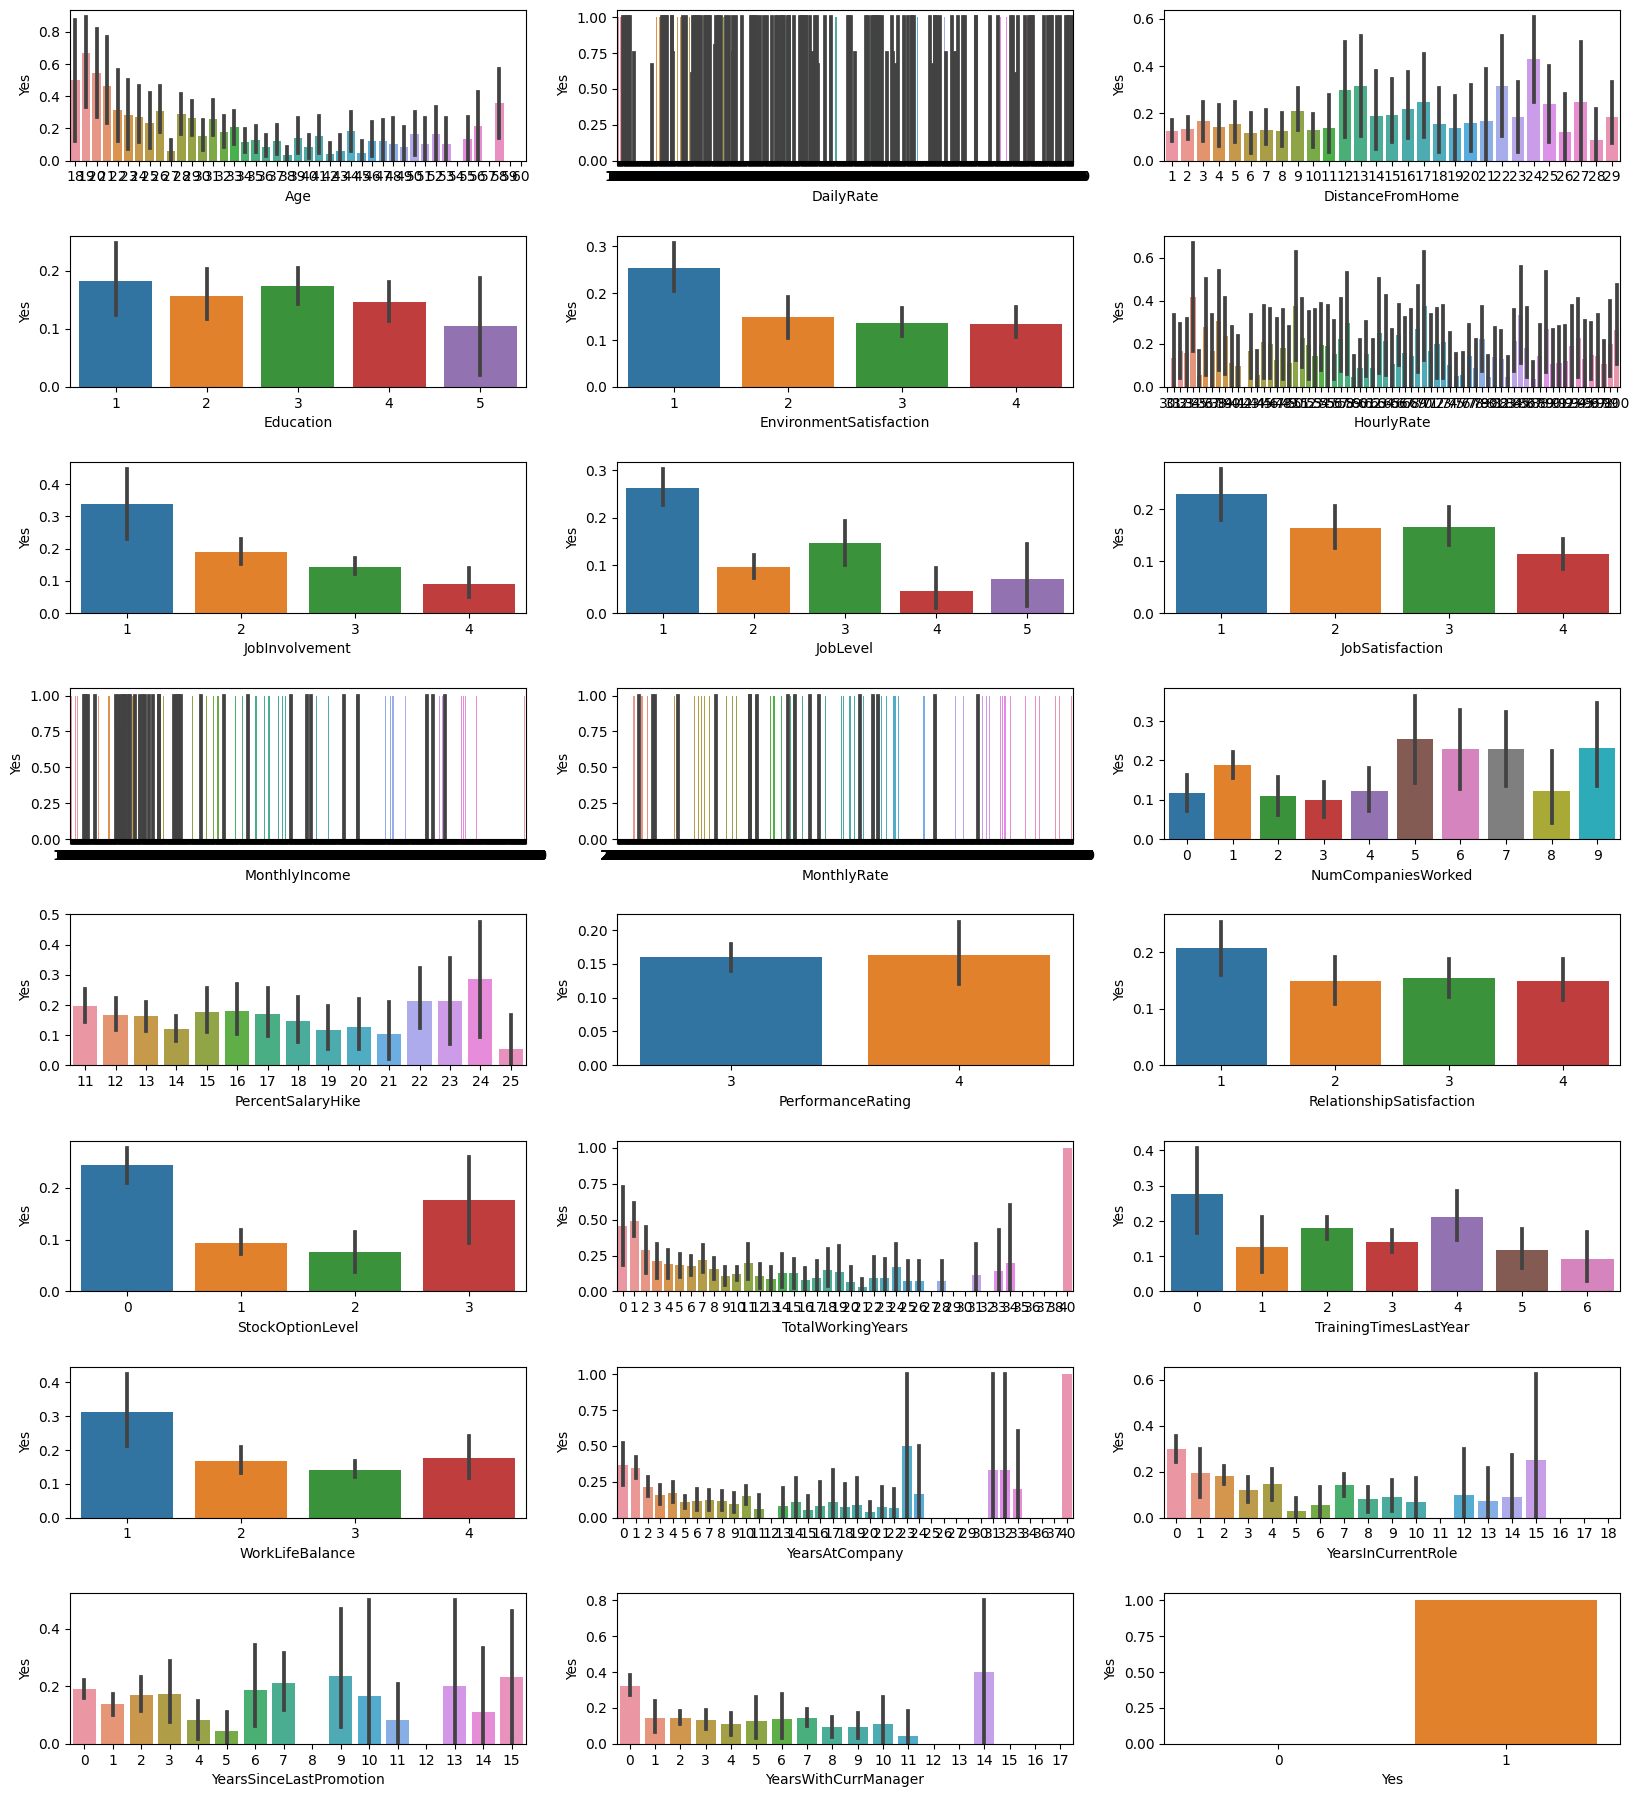

In [57]:
plt.figure(figsize=(20,20))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.2)
for i in con:
    plt.subplot(9,3,x)
    x = x + 1
    sns.barplot(x=i,y='Yes',data=df1)
plt.show()

<AxesSubplot: xlabel='JobInvolvement'>

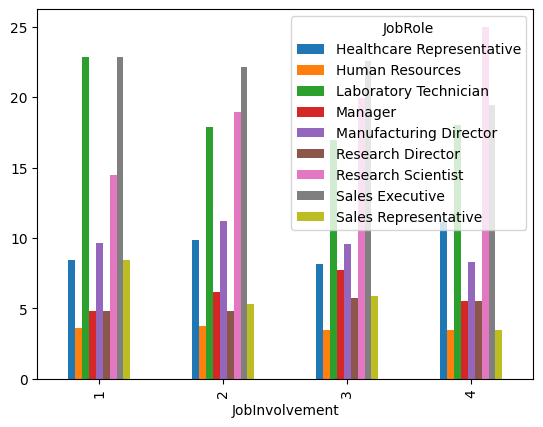

In [58]:
(pd.crosstab(df['JobInvolvement'],df['JobRole'],normalize='index')*100).plot(kind='bar')

<AxesSubplot: xlabel='JobSatisfaction'>

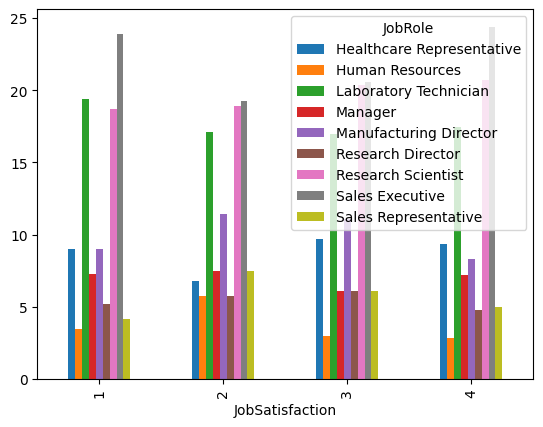

In [59]:
(pd.crosstab(df['JobSatisfaction'],df['JobRole'],normalize='index')*100).plot(kind='bar')

In [60]:
for i in cat:
    label_encoder = preprocessing.LabelEncoder()
    df2[i]= label_encoder.fit_transform(df2[i])  
    print(f'Label encoding for {i} is:',df2[i].unique())

Label encoding for BusinessTravel is: [2 1 0]
Label encoding for Department is: [2 1 0]
Label encoding for EducationField is: [1 4 3 2 5 0]
Label encoding for Gender is: [0 1]
Label encoding for JobRole is: [7 6 2 4 0 3 8 5 1]
Label encoding for MaritalStatus is: [2 1 0]
Label encoding for OverTime is: [1 0]


## Feature selection

#### VIF

<AxesSubplot: >

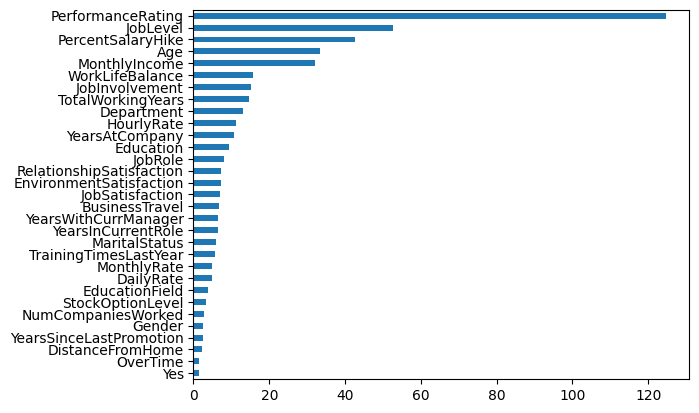

In [61]:
vif_list = []
for i in range(df2.shape[1]):
    vif = variance_inflation_factor(df2.values, i)
    vif_list.append(vif)
s3 = pd.Series(vif_list, index=df1.columns)
s3.sort_values().plot(kind='barh')

In [62]:
df3=df2
df3

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
0,41,2,1102,2,1,2,1,2,0,94,...,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,3,1,61,...,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,1,92,...,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,4,0,56,...,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,1,40,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,...,3,1,17,3,3,5,2,0,3,0
1466,39,2,613,1,6,1,3,4,1,42,...,1,1,9,5,3,7,7,1,7,0
1467,27,2,155,1,4,3,1,2,1,87,...,2,1,6,0,3,6,2,0,3,0
1468,49,1,1023,2,2,3,3,4,1,63,...,4,0,17,3,2,9,6,0,8,0


In [63]:
x1=df3.drop(['Yes'],axis=1)
y1=df3['Yes']

In [64]:
#chi-Square Test

chi2_value, p_val = chi2(x1,y1)
chi2_df = pd.DataFrame({'Chi-sqr': chi2_value, 'P-Val': np.around(p_val,3)}, index=x1.columns)
chi2_df.sort_values('P-Val')

,Chi-sqr,P-Val
Age,84.155277,0.000
YearsInCurrentRole,117.522596,0.000
YearsAtCompany,142.100054,0.000
TotalWorkingYears,230.721618,0.000
StockOptionLevel,25.268826,0.000
OverTime,63.845067,0.000
MonthlyRate,1196.633553,0.000
MonthlyIncome,127922.293694,0.000
JobLevel,24.939242,0.000
MaritalStatus,18.745657,0.000


In [65]:
chi2_df[chi2_df['P-Val']<0.05]      # This are important features

,Chi-sqr,P-Val
Age,84.155277,0.000
DailyRate,956.580494,0.000
DistanceFromHome,63.772142,0.000
EnvironmentSatisfaction,6.890594,0.009
JobInvolvement,4.605616,0.032
JobLevel,24.939242,0.000
JobRole,9.004448,0.003
JobSatisfaction,7.011947,0.008
MaritalStatus,18.745657,0.000
MonthlyIncome,127922.293694,0.000


In [66]:
chi2_df[chi2_df['P-Val']>0.05]

,Chi-sqr,P-Val
BusinessTravel,0.000002,0.999
Department,1.329297,0.249
Education,0.520642,0.471
EducationField,0.834912,0.361
Gender,0.510087,0.475
HourlyRate,0.431779,0.511
PercentSalaryHike,0.235027,0.628
PerformanceRating,0.000506,0.982
RelationshipSatisfaction,1.332333,0.248
TrainingTimesLastYear,3.085796,0.079


#### ANOVA 

In [67]:
from sklearn.feature_selection import f_classif
f_val, p_val = f_classif(x1, y1)
df_anova = pd.DataFrame({'F-Val':f_val , 'P-Val': np.around(p_val,4)}, index=x1.columns)
df_anova

,F-Val,P-Val
Age,38.175887,0.0000
BusinessTravel,0.000008,0.9977
DailyRate,4.726640,0.0299
Department,6.035877,0.0141
DistanceFromHome,8.968277,0.0028
Education,1.446308,0.2293
EducationField,1.058726,0.3037
EnvironmentSatisfaction,15.855209,0.0001
Gender,1.274587,0.2591
HourlyRate,0.068796,0.7931


In [68]:
df_anova[p_val<0.05]                      # This are important features

,F-Val,P-Val
Age,38.175887,0.0000
DailyRate,4.726640,0.0299
Department,6.035877,0.0141
DistanceFromHome,8.968277,0.0028
EnvironmentSatisfaction,15.855209,0.0001
JobInvolvement,25.241985,0.0000
JobLevel,43.215344,0.0000
JobRole,6.649672,0.0100
JobSatisfaction,15.890004,0.0001
MaritalStatus,39.599763,0.0000


In [69]:
df_anova[p_val>0.05]

,F-Val,P-Val
BusinessTravel,0.000008,0.9977
Education,1.446308,0.2293
EducationField,1.058726,0.3037
Gender,1.274587,0.2591
HourlyRate,0.068796,0.7931
MonthlyRate,0.337916,0.5611
NumCompaniesWorked,2.782287,0.0955
PercentSalaryHike,0.266728,0.6056
PerformanceRating,0.012250,0.9119
RelationshipSatisfaction,3.095576,0.0787


In [70]:
# we are taking only important features

In [71]:
col=['Age', 'DailyRate', 'Department', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager']

In [72]:
df4=df1[df_anova[p_val<0.05].index]
df4

,Age,DailyRate,Department,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1102,2,1,2,3,2,7,4,2,5993,1,0,8,0,1,6,4,5
1,49,279,1,8,3,2,2,6,2,1,5130,0,1,10,3,3,10,7,7
2,37,1373,1,2,4,2,1,2,3,2,2090,1,0,7,3,3,0,0,0
3,33,1392,1,3,4,3,1,6,3,1,2909,1,0,8,3,3,8,7,0
4,27,591,1,2,1,3,1,2,2,1,3468,0,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,1,23,3,4,2,2,4,1,2571,0,1,17,3,3,5,2,3
1466,39,613,1,6,4,2,3,0,1,1,9991,0,1,9,5,3,7,7,7
1467,27,155,1,4,2,4,2,4,2,1,6142,1,1,6,0,3,6,2,3
1468,49,1023,2,2,4,2,2,7,2,1,5390,0,0,17,3,2,9,6,8


In [73]:
df5=pd.get_dummies(df4,columns=['Department','JobRole','MaritalStatus'])


In [74]:
df5

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,OverTime,StockOptionLevel,...,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2
0,41,1102,1,2,3,2,4,5993,1,0,...,0,0,0,0,0,1,0,0,0,1
1,49,279,8,3,2,2,2,5130,0,1,...,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,4,2,1,3,2090,1,0,...,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,3,1,3,2909,1,0,...,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,3,1,2,3468,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,3,4,2,4,2571,0,1,...,1,0,0,0,0,0,0,0,1,0
1466,39,613,6,4,2,3,1,9991,0,1,...,0,0,0,0,0,0,0,0,1,0
1467,27,155,4,2,4,2,2,6142,1,1,...,0,0,1,0,0,0,0,0,1,0
1468,49,1023,2,4,2,2,2,5390,0,0,...,0,0,0,0,0,1,0,0,1,0


In [75]:
df5.shape

(1470, 31)

In [76]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   DailyRate                1470 non-null   int64
 2   DistanceFromHome         1470 non-null   int64
 3   EnvironmentSatisfaction  1470 non-null   int64
 4   JobInvolvement           1470 non-null   int64
 5   JobLevel                 1470 non-null   int64
 6   JobSatisfaction          1470 non-null   int64
 7   MonthlyIncome            1470 non-null   int64
 8   OverTime                 1470 non-null   int32
 9   StockOptionLevel         1470 non-null   int64
 10  TotalWorkingYears        1470 non-null   int64
 11  TrainingTimesLastYear    1470 non-null   int64
 12  WorkLifeBalance          1470 non-null   int64
 13  YearsAtCompany           1470 non-null   int64
 14  YearsInCurrentRole       1470 non-null   int64
 15  Year

## Model Training

### Train Test Split

In [77]:
x=df5



In [78]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=12,stratify=y)

In [79]:
x_train.shape

(1176, 31)

In [80]:
x_test.shape

(294, 31)

### Model installation

### Logistic Regression

In [81]:
log_clf=LogisticRegression()
log_clf.fit(x_train,y_train)

LogisticRegression()

In [82]:
def evaluate_model(string,model, ind_var, act):
    print(string.center(50, '*'))
    
        
    pred=model.predict(ind_var)
    cnf_matrix=confusion_matrix(act,pred)
    print('confusion matrix \n',cnf_matrix)
    
    tn, fp, fn, tp=confusion_matrix(act,pred).ravel()
    print(f'tn={tn}, fp={fp}, fn={fn}, tp={tp}')
    
    accuracy=accuracy_score(act,pred)
    print('Accuracy:',accuracy)
    
    clf_report=classification_report(act,pred)
    print('Classification report:\n',clf_report)
    
    
evaluate_model('Testing Data Evaluation',log_clf, x_test, y_test)

evaluate_model('Training Data Evaluation',log_clf,x_train,y_train)

*************Testing Data Evaluation**************
confusion matrix 
 [[247   0]
 [ 46   1]]
tn=247, fp=0, fn=46, tp=1
Accuracy: 0.8435374149659864
Classification report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       1.00      0.02      0.04        47

    accuracy                           0.84       294
   macro avg       0.92      0.51      0.48       294
weighted avg       0.87      0.84      0.78       294

*************Training Data Evaluation*************
confusion matrix 
 [[986   0]
 [190   0]]
tn=986, fp=0, fn=190, tp=0
Accuracy: 0.8384353741496599
Classification report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       986
           1       0.00      0.00      0.00       190

    accuracy                           0.84      1176
   macro avg       0.42      0.50      0.46      1176
weighted avg       0.70      0.84      0.76      1176



In [83]:
x=df2.drop('Yes',axis=1)
y=df['Yes']

In [84]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=20,stratify=y)

In [85]:
x_train.shape

(1176, 30)

In [86]:
x_test.shape

(294, 30)

In [87]:
log_clf1=LogisticRegression()
log_clf1.fit(x_train,y_train)

LogisticRegression()

In [88]:
evaluate_model('Testing Data Evaluation',log_clf1, x_test, y_test)
evaluate_model('Trainng Data Evaluation',log_clf1,x_train,y_train)

*************Testing Data Evaluation**************
confusion matrix 
 [[247   0]
 [ 45   2]]
tn=247, fp=0, fn=45, tp=2
Accuracy: 0.8469387755102041
Classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       1.00      0.04      0.08        47

    accuracy                           0.85       294
   macro avg       0.92      0.52      0.50       294
weighted avg       0.87      0.85      0.78       294

*************Trainng Data Evaluation**************
confusion matrix 
 [[984   2]
 [184   6]]
tn=984, fp=2, fn=184, tp=6
Accuracy: 0.8418367346938775
Classification report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       986
           1       0.75      0.03      0.06       190

    accuracy                           0.84      1176
   macro avg       0.80      0.51      0.49      1176
weighted avg       0.83      0.84      0.78      1176



In [89]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [91]:
y.value_counts()

0    1233
1     237
Name: Yes, dtype: int64

### After applying SMOTE

In [92]:
x2 = df5
y2 = df['Yes']


x_train, x_test, y_train, y_test = train_test_split(x2,y2, test_size=0.25, random_state=12, stratify=y)


smote_os = SMOTE(sampling_strategy=0.85)
x_train_sm, y_train_sm = smote_os.fit_resample(x_train,y_train)

log_clf3 = LogisticRegression()
log_clf3.fit(x_train_sm, y_train_sm)

   
evaluate_model('Training Data Evaluation',log_clf3,x_train_sm,y_train_sm)
print('**'*100)

evaluate_model('Testing Data Evaluation',log_clf3,x_test,y_test)  


*************Training Data Evaluation*************
confusion matrix 
 [[705 219]
 [286 499]]
tn=705, fp=219, fn=286, tp=499
Accuracy: 0.7045055588063195
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.74       924
           1       0.69      0.64      0.66       785

    accuracy                           0.70      1709
   macro avg       0.70      0.70      0.70      1709
weighted avg       0.70      0.70      0.70      1709

********************************************************************************************************************************************************************************************************
*************Testing Data Evaluation**************
confusion matrix 
 [[241  68]
 [ 26  33]]
tn=241, fp=68, fn=26, tp=33
Accuracy: 0.7445652173913043
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.84       309
           1

In [93]:
y2.value_counts()

0    1233
1     237
Name: Yes, dtype: int64

In [94]:
y_train.value_counts()

0    924
1    178
Name: Yes, dtype: int64

#### Oversampling technique

In [95]:
rndm_os = RandomOverSampler(sampling_strategy=0.8)
x_train_ros, y_train_ros = rndm_os.fit_resample(x_train,y_train)
print(y_train.value_counts())
print(y_train_ros.value_counts())

0    924
1    178
Name: Yes, dtype: int64
0    924
1    739
Name: Yes, dtype: int64


In [96]:
logistic_clf = LogisticRegression()
logistic_clf.fit(x_train_ros, y_train_ros)
evaluate_model('Testing Data Evaluation',logistic_clf, x_test, y_test)

evaluate_model('Training Data Evaluation',logistic_clf, x_train_ros, y_train_ros)

*************Testing Data Evaluation**************
confusion matrix 
 [[239  70]
 [ 29  30]]
tn=239, fp=70, fn=29, tp=30
Accuracy: 0.7309782608695652
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83       309
           1       0.30      0.51      0.38        59

    accuracy                           0.73       368
   macro avg       0.60      0.64      0.60       368
weighted avg       0.80      0.73      0.76       368

*************Training Data Evaluation*************
confusion matrix 
 [[701 223]
 [319 420]]
tn=701, fp=223, fn=319, tp=420
Accuracy: 0.6740829825616356
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.76      0.72       924
           1       0.65      0.57      0.61       739

    accuracy                           0.67      1663
   macro avg       0.67      0.66      0.66      1663
weighted avg       0.67      0.67      0.67      1

In [97]:
from sklearn.neighbors import KNeighborsClassifier

### KNN Model

In [98]:
knn_clf=KNeighborsClassifier(n_neighbors=7,p=1)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

In [99]:
evaluate_model('Testing Data Evaluation',knn_clf,x_test,y_test)
evaluate_model('Training Data Evaluation',knn_clf,x_train,y_train)

*************Testing Data Evaluation**************
confusion matrix 
 [[299  10]
 [ 57   2]]
tn=299, fp=10, fn=57, tp=2
Accuracy: 0.8179347826086957
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       309
           1       0.17      0.03      0.06        59

    accuracy                           0.82       368
   macro avg       0.50      0.50      0.48       368
weighted avg       0.73      0.82      0.76       368

*************Training Data Evaluation*************
confusion matrix 
 [[915   9]
 [150  28]]
tn=915, fp=9, fn=150, tp=28
Accuracy: 0.8557168784029038
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       924
           1       0.76      0.16      0.26       178

    accuracy                           0.86      1102
   macro avg       0.81      0.57      0.59      1102
weighted avg       0.84      0.86      0.81      1102


### Hyperparameter tuning to KNN

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
knn_clf = KNeighborsClassifier()

hyperparameters = { 'n_neighbors': np.arange(3,20),
                  'p' : [1,2]}

gscv_knn_clf = GridSearchCV(knn_clf, hyperparameters, cv = 3)
gscv_knn_clf.fit(x_train,y_train)
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=17, p=1)

In [102]:
gscv_knn_clf.best_params_

{'n_neighbors': 17, 'p': 1}

In [103]:
knn_clf = gscv_knn_clf.best_estimator_
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17, p=1)

In [104]:
evaluate_model('Testing Data Evaluation',knn_clf,x_test,y_test)
evaluate_model('Training Data Evaluation',knn_clf,x_train,y_train)

*************Testing Data Evaluation**************
confusion matrix 
 [[302   7]
 [ 57   2]]
tn=302, fp=7, fn=57, tp=2
Accuracy: 0.8260869565217391
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90       309
           1       0.22      0.03      0.06        59

    accuracy                           0.83       368
   macro avg       0.53      0.51      0.48       368
weighted avg       0.74      0.83      0.77       368

*************Training Data Evaluation*************
confusion matrix 
 [[915   9]
 [164  14]]
tn=915, fp=9, fn=164, tp=14
Accuracy: 0.8430127041742287
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       924
           1       0.61      0.08      0.14       178

    accuracy                           0.84      1102
   macro avg       0.73      0.53      0.53      1102
weighted avg       0.81      0.84      0.79      1102



### KNN with SMOTE

In [105]:
smote_os_k1 = SMOTE(sampling_strategy=0.95)
x_train_sm1, y_train_sm1 = smote_os_k1.fit_resample(x_train,y_train)
print('Before Sampling \n',y_train.value_counts())
print('After Smote Sampling \n',y_train_sm.value_counts())

Before Sampling 
 0    924
1    178
Name: Yes, dtype: int64
After Smote Sampling 
 0    924
1    785
Name: Yes, dtype: int64


In [106]:
knn_clf1 = KNeighborsClassifier(n_neighbors=11, p=1)
knn_clf1.fit(x_train_sm1, y_train_sm1)  
evaluate_model('Training data Evaluation',knn_clf1,x_train_sm1,y_train_sm1)
evaluate_model('Testing data Evaluation',knn_clf1,x_test,y_test)


*************Training data Evaluation*************
confusion matrix 
 [[663 261]
 [120 757]]
tn=663, fp=261, fn=120, tp=757
Accuracy: 0.7884508606329816
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       924
           1       0.74      0.86      0.80       877

    accuracy                           0.79      1801
   macro avg       0.80      0.79      0.79      1801
weighted avg       0.80      0.79      0.79      1801

*************Testing data Evaluation**************
confusion matrix 
 [[208 101]
 [ 33  26]]
tn=208, fp=101, fn=33, tp=26
Accuracy: 0.6358695652173914
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.67      0.76       309
           1       0.20      0.44      0.28        59

    accuracy                           0.64       368
   macro avg       0.53      0.56      0.52       368
weighted avg       0.76      0.64      0.68      

### Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [108]:
dt_clf=DecisionTreeClassifier(random_state=20)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=20)

In [109]:
evaluate_model('Testing Data Evaluation',dt_clf,x_test,y_test)
evaluate_model('Training Data Evaluation',dt_clf,x_train,y_train)

*************Testing Data Evaluation**************
confusion matrix 
 [[267  42]
 [ 42  17]]
tn=267, fp=42, fn=42, tp=17
Accuracy: 0.7717391304347826
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       309
           1       0.29      0.29      0.29        59

    accuracy                           0.77       368
   macro avg       0.58      0.58      0.58       368
weighted avg       0.77      0.77      0.77       368

*************Training Data Evaluation*************
confusion matrix 
 [[924   0]
 [  0 178]]
tn=924, fp=0, fn=0, tp=178
Accuracy: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       924
           1       1.00      1.00      1.00       178

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102



### Decision Tree by hyperparameter Tunning

In [110]:
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,

In [111]:
dt_model = DecisionTreeClassifier(random_state=20)
hyperparamters = {'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':np.arange(3,10),
    'min_samples_split':np.arange(5,20) ,
    'min_samples_leaf':np.arange(3,20)}

gscv_dt_model = GridSearchCV(dt_model, hyperparamters, cv = 5)
gscv_dt_model.fit(x_train, y_train)
gscv_dt_model.best_estimator_

KeyboardInterrupt: 

In [ ]:
gscv_dt_model.best_params_

In [ ]:
dt_clf = DecisionTreeClassifier(criterion='gini',max_depth=7, min_samples_leaf=5, min_samples_split=14,
                       random_state=20, splitter='random')
dt_clf.fit(x_train,y_train)

In [ ]:
evaluate_model('Training Data Evalation',dt_clf,x_train,y_train)
evaluate_model('Testing Data Evaluation',dt_clf,x_test,y_test)


In [ ]:
plt.figure(figsize=(50,20))
plot_tree(dt_clf, feature_names=x.columns, filled=True, class_names=['0','1'],fontsize=20)
plt.savefig('Decision_tree_hyperparameters.png', dpi = 300)

#### decision Tree with sampling technique

In [ ]:
dt_clf1=DecisionTreeClassifier(random_state=20)
dt_clf1.fit(x_train_sm1,y_train_sm1)
evaluate_model('Training Data Evaluation',dt_clf1,x_train_sm1,y_train_sm1)
evaluate_model('Testing Data Evaluation',dt_clf1,x_test,y_test)

In [113]:
import pickle

In [114]:
with open('KNN_SMOTE.pkl', 'wb') as f:
    pickle.dump(knn_clf1, f)